(15, 10)


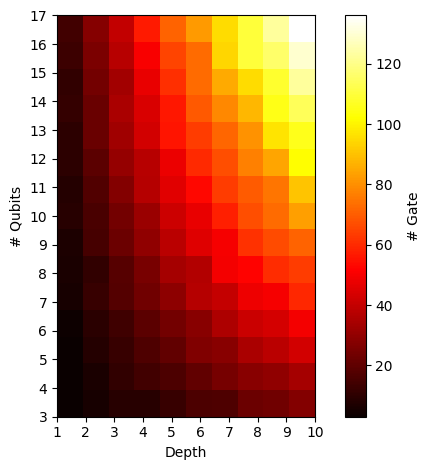

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

num_qubits = range(3, 18)
depths = range(1, 11)
num_gatess = np.zeros((len(num_qubits), len(depths)))
num_repeats = 2
for depth in depths:
    for times in range(1, num_repeats + 1):
        num_gates = np.loadtxt(f'./gate/qrc/{times}/qrc_{depth}depth_NumGate.txt', dtype=int)
        num_gatess[:, depth-1] += num_gates
    num_gatess[:, depth-1] = num_gatess[:, depth-1] / num_repeats
print(num_gatess.shape)


X, Y = np.meshgrid(num_qubits, depths)
# Plot the heatmap
plt.imshow(num_gatess, cmap='hot', origin='lower', extent = [1, 10, 3, 17])
plt.yticks(num_qubits)
plt.xticks(depths)
plt.xlabel('Depth')
plt.ylabel('# Qubits')

cbar = plt.colorbar()
cbar.set_label('# Gate')  # Label for the colorbar
plt.tight_layout()
plt.savefig('./images/gate_qrc.svg')

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

num_qubits = range(3, 18)
depths = range(1, 11)
num_gatess1 = np.zeros((len(num_qubits), len(depths)))
num_gatess2 = np.zeros((len(num_qubits), len(depths)))
num_repeats = 100
gate_densitiess = np.zeros((len(num_qubits), len(depths)), dtype=float)
for depth in depths:
    for times in range(1, num_repeats + 1):
        num_gates1 = np.loadtxt(f'./gate/qrc/{times}/qrc_{depth}depth_NumGate1.txt', dtype=int)
        num_gates2 = np.loadtxt(f'./gate/qrc/{times}/qrc_{depth}depth_NumGate2.txt', dtype=int)
        num_gatess1[:, depth-1] += num_gates1
        num_gatess2[:, depth-1] += num_gates2
        
    num_gatess1[:, depth-1] = num_gatess1[:, depth-1] / num_repeats
    num_gatess2[:, depth-1] = num_gatess2[:, depth-1] / num_repeats
print(num_gatess1.shape)
for qubit in num_qubits:
    for depth in depths:
        print(qubit*depth)
        print(num_gatess1[qubit-3, depth-1] + 2*num_gatess2[qubit-3, depth-1])
        gate_densitiess[qubit-3, depth-1] = (num_gatess1[qubit-3, depth-1] + 2*num_gatess2[qubit-3, depth-1])/(qubit*depth)

    
X, Y = np.meshgrid(num_qubits, depths)
# Plot the heatmap
plt.imshow(gate_densitiess, cmap='hot', origin='lower', extent = [1, 10, 3, 17])
plt.yticks(num_qubits)
plt.xticks(depths)
plt.xlabel('Depth')
plt.ylabel('# Qubits')

cbar = plt.colorbar()
cbar.set_label('# Gate')  # Label for the colorbar
plt.tight_layout()
# plt.savefig('./images/gate_qrc.svg')

In [18]:
import qiskit
import qiskit.quantum_info
import numpy as np
import time
%load_ext autoreload
%autoreload 2
def transpiled_circuit(qc):
    qc = qiskit.transpile(qc, optimization_level = 2)
    return qc

def transpiled_circuit_clifford(qc):
    qc = qiskit.transpile(qc, 
        basis_gates=['h', 'cx', 's',
                    'rx','ry','rz'])
    return qc

def haar(num_qubits: int):
    """
    to generate random matrix for Haar measure
    see https://arxiv.org/pdf/math-ph/0609050.pdf
    """
    d = 2**num_qubits
    array = (np.random.randn(d,d) + 1j*np.random.randn(d,d))/np.sqrt(2.0)
    ortho,upper = np.linalg.qr(array)
    diag = np.diagonal(upper)
    temp = diag/np.absolute(diag)
    result = np.multiply(ortho,temp,ortho)
    basic_state = np.zeros(d)
    basic_state[0] = 1
    return result @ basic_state

for num_qubits in range(3, 10):
    state = haar(num_qubits)
    qc = qiskit.QuantumCircuit(num_qubits)
    qc.prepare_state(state, list(range(0, num_qubits)))
    qc_transpiled = transpiled_circuit_clifford(qc)
    ops = qc_transpiled.count_ops()
    if 'cx' in ops:
        num_2q_gates = ops['cx']
    else:
        num_2q_gates = 0

    num_1q_gates = sum(ops[key] for key in ops if key != 'cx')
    print((num_1q_gates + 2*num_2q_gates)/(qc.depth() * num_qubits))
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10.0
18.5
33.2
59.0
104.85714285714286
187.25
336.6666666666667
